<h1>Life Expectancy and GDP data analysis</h1>

First, let's set up our data so we can work with it.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('all_data.csv')

In [38]:
print('the dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))
df.columns=[s.lower() for s in list(df.columns)]
df.rename(columns={'life expectancy at birth (years)':'life_expectancy'}, inplace=True)
df.country=df.country.apply(lambda row: str(row))
print(df.dtypes)
print(df.head(10))

the dataset has 96 rows and 4 columns
country             object
year                 int64
life_expectancy    float64
gdp                float64
dtype: object
  country  year  life_expectancy           gdp
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10
5   Chile  2005             78.4  1.229650e+11
6   Chile  2006             78.9  1.547880e+11
7   Chile  2007             78.9  1.736060e+11
8   Chile  2008             79.6  1.796380e+11
9   Chile  2009             79.3  1.723890e+11


Let's see the different countries and years we have information of.

In [42]:
df['country']=df.country.replace('United States of America', 'USA')

In [43]:
countries=df.country.unique()
years=df.year.unique()
print(countries)
print(df.groupby('country').year.count().reset_index())
print(df.groupby('year').country.count().reset_index())

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']
    country  year
0     Chile    16
1     China    16
2   Germany    16
3    Mexico    16
4       USA    16
5  Zimbabwe    16
    year  country
0   2000        6
1   2001        6
2   2002        6
3   2003        6
4   2004        6
5   2005        6
6   2006        6
7   2007        6
8   2008        6
9   2009        6
10  2010        6
11  2011        6
12  2012        6
13  2013        6
14  2014        6
15  2015        6


So we have information on Chile, China, Germany, Mexico, USA and Zimbabwe through the years 2000-2015.
Now let's see the mean life expectancy for each country in this time period.

In [53]:
countries_metrics=df.groupby('country').life_expectancy.mean().reset_index()
countries_metrics['mean_gdp']=df.groupby('country').gdp.mean().reset_index()['gdp']
countries_metrics.rename(columns={'life_expectancy':'mean_life_expectancy'}, inplace=True)
countries_metrics=countries_metrics.sort_values(by=['mean_life_expectancy'],ascending=False)
print(countries_metrics)

    country  mean_life_expectancy      mean_gdp
2   Germany              79.65625  3.094776e+12
0     Chile              78.94375  1.697888e+11
4       USA              78.06250  1.407500e+13
3    Mexico              75.71875  9.766506e+11
1     China              74.26250  4.957714e+12
5  Zimbabwe              50.09375  9.062580e+09


We see that Zimbabwe has the lowest mean life expectancy along with the lowest mean GDP. to better explain this fact we need to take a look at the data of the different countries.

In [65]:
chile=df[df.country=='Chile'].reset_index(drop=True)
china=df[df.country=='China'].reset_index(drop=True)
germany=df[df.country=='Germany'].reset_index(drop=True)
mexico=df[df.country=='Mexico'].reset_index(drop=True)
usa=df[df.country=='USA'].reset_index(drop=True)
zimbabwe=df[df.country=='Zimbabwe'].reset_index(drop=True)


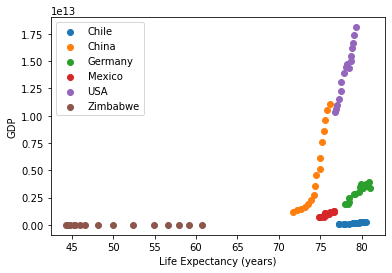

In [66]:
ax=plt.subplot()
plt.scatter(chile.life_expectancy, chile.gdp, label='Chile')
plt.scatter(china.life_expectancy, china.gdp, label='China')
plt.scatter(germany.life_expectancy, germany.gdp, label='Germany')
plt.scatter(mexico.life_expectancy, mexico.gdp, label='Mexico')
plt.scatter(usa.life_expectancy, usa.gdp, label='USA')
plt.scatter(zimbabwe.life_expectancy, zimbabwe.gdp, label='Zimbabwe')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('GDP')
plt.legend()
plt.show()

By taking a look at this graph we can see the correlation between GDP and life expectancy, note that in world power countries like USA and China they have had a rapid increase in GDP with minor changer in their life expectancies, Germany on the other hand has always had a high life expectancy but little GDP growth in the studied time period. Note that Zimbabwe has a significantly less life expectancy than other countries but still, it is growing while keeping its GDP in the same values; it wasn't until 2009 that Zimbabwe had a significant increase in both GDP life expectancy.


In [75]:
print(zimbabwe)

     country  year  life_expectancy           gdp
0   Zimbabwe  2000             46.0  6.689958e+09
1   Zimbabwe  2001             45.3  6.777385e+09
2   Zimbabwe  2002             44.8  6.342116e+09
3   Zimbabwe  2003             44.5  5.727592e+09
4   Zimbabwe  2004             44.3  5.805598e+09
5   Zimbabwe  2005             44.6  5.755215e+09
6   Zimbabwe  2006             45.4  5.443896e+09
7   Zimbabwe  2007             46.6  5.291950e+09
8   Zimbabwe  2008             48.2  4.415703e+09
9   Zimbabwe  2009             50.0  8.621574e+09
10  Zimbabwe  2010             52.4  1.014186e+10
11  Zimbabwe  2011             54.9  1.209845e+10
12  Zimbabwe  2012             56.6  1.424249e+10
13  Zimbabwe  2013             58.0  1.545177e+10
14  Zimbabwe  2014             59.2  1.589105e+10
15  Zimbabwe  2015             60.7  1.630467e+10


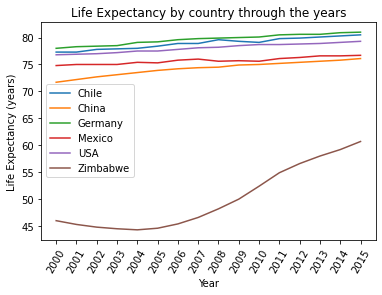

In [74]:
ax=plt.subplot()
plt.plot(years, chile.life_expectancy, label='Chile')
plt.plot(years, china.life_expectancy, label='China')
plt.plot(years, germany.life_expectancy, label='Germany')
plt.plot(years, mexico.life_expectancy, label='Mexico')
plt.plot(years, usa.life_expectancy, label='USA')
plt.plot(years, zimbabwe.life_expectancy, label='Zimbabwe')
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=60)
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.title('Life Expectancy by country through the years')
plt.legend()
plt.show()

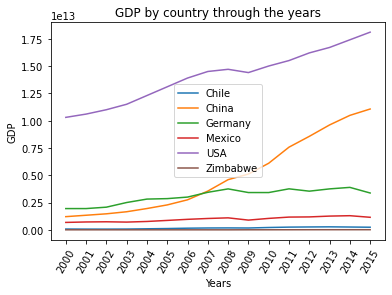

In [73]:
ax=plt.subplot()
plt.plot(years, chile.gdp, label='Chile')
plt.plot(years, china.gdp, label='China')
plt.plot(years, germany.gdp, label='Germany')
plt.plot(years, mexico.gdp, label='Mexico')
plt.plot(years, usa.gdp, label='USA')
plt.plot(years, zimbabwe.gdp, label='Zimbabwe')
plt.legend()
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=60)
plt.xlabel('Years')
plt.ylabel('GDP')
plt.title('GDP by country through the years')
plt.show()

Now let's apply a hypothesis test to ensure the observed data is not a result of chance. We will use the Chi squared test with the GDP and Life expectancy columns.

In [83]:
import numpy as np
from scipy.stats import chi2_contingency
for c in countries:
    arr=np.array(df[df.country==c][['life_expectancy','gdp']].reset_index(drop=True))
    ch,p_val,dof,ex=chi2_contingency(arr)
    print('{}: {}'.format(c, p_val))


Chile: 1.3237123577763536e-60
China: 2.1829770509747513e-163
Germany: 8.668939446302759e-08
Mexico: 4.929528261863451e-06
USA: 0.00468723379054244
Zimbabwe: 1.7950811649618197e-14


As none of the p values corresponding to each country is greater than .05 we can safely conclude there is a statistically significant association between the GDP and life expectancy in each country.
Using this data we could analyze and confirm the relationship between the increases of life expectancy and GDP in the mentioned countries. 
To gain further insight into this relationship, other indicators of life quality can be analyzed, such as:
<ul>
    <li>Climate</li>
    <li>Pollution</li>
    <li>Crime rate</li>
    <li>Health Care index</li>
    <li>Cost of living</li>
</ul>
The analysis of these indicators can reveal a dominant feature for countries with high life expectancy, and can help focus the efforts in opportunity areas in other countries.